# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [2]:
 Bot check

 HW_ID: fpmi_ad1
 Бот проверит этот ID и предупредит, если случайно сдать что-то не то

 Status: final
 Перед отправкой в финальном решении удали "not" в строчке выше
 Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [4]:
shuffled_indices = np.random.permutation(len(df))
split = int(len(df) * 0.7)
train_indices = shuffled_indices[:split]
test_indices = shuffled_indices[split:]
train_df = df.iloc[train_indices]
test_df = df.iloc[test_indices]
# Сброс индексов в обучающей выборке
train_df = train_df.reset_index(drop=True)
# Сброс индексов в тестовой выборке
test_df = test_df.reset_index(drop=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C
1,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
2,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
3,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S
4,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [5]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [6]:
train_features, train_target = get_features_and_target(train_df)
test_features, test_target = get_features_and_target(test_df)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

##### Разделение данных по полу

In [19]:
male_passengers = train_df[train_df['Sex'] == 'male']
female_passengers = train_df[train_df['Sex'] == 'female']
median_age = male_passengers['Age'].median()

male_passengers_copy = male_passengers.copy()
female_passengers_copy = female_passengers.copy()

median_fare = train_df['Fare'].median()

male_passengers_copy['TicketsCost'] = ['Выше медианы' if age > median_fare else 'Ниже медианы' for age in male_passengers_copy['Fare']]
female_passengers_copy['TicketsCost'] = ['Выше медианы' if age > median_fare else 'Ниже медианы' for age in female_passengers_copy['Fare']]


##### Визуализация влияния признаков на выживаемость

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


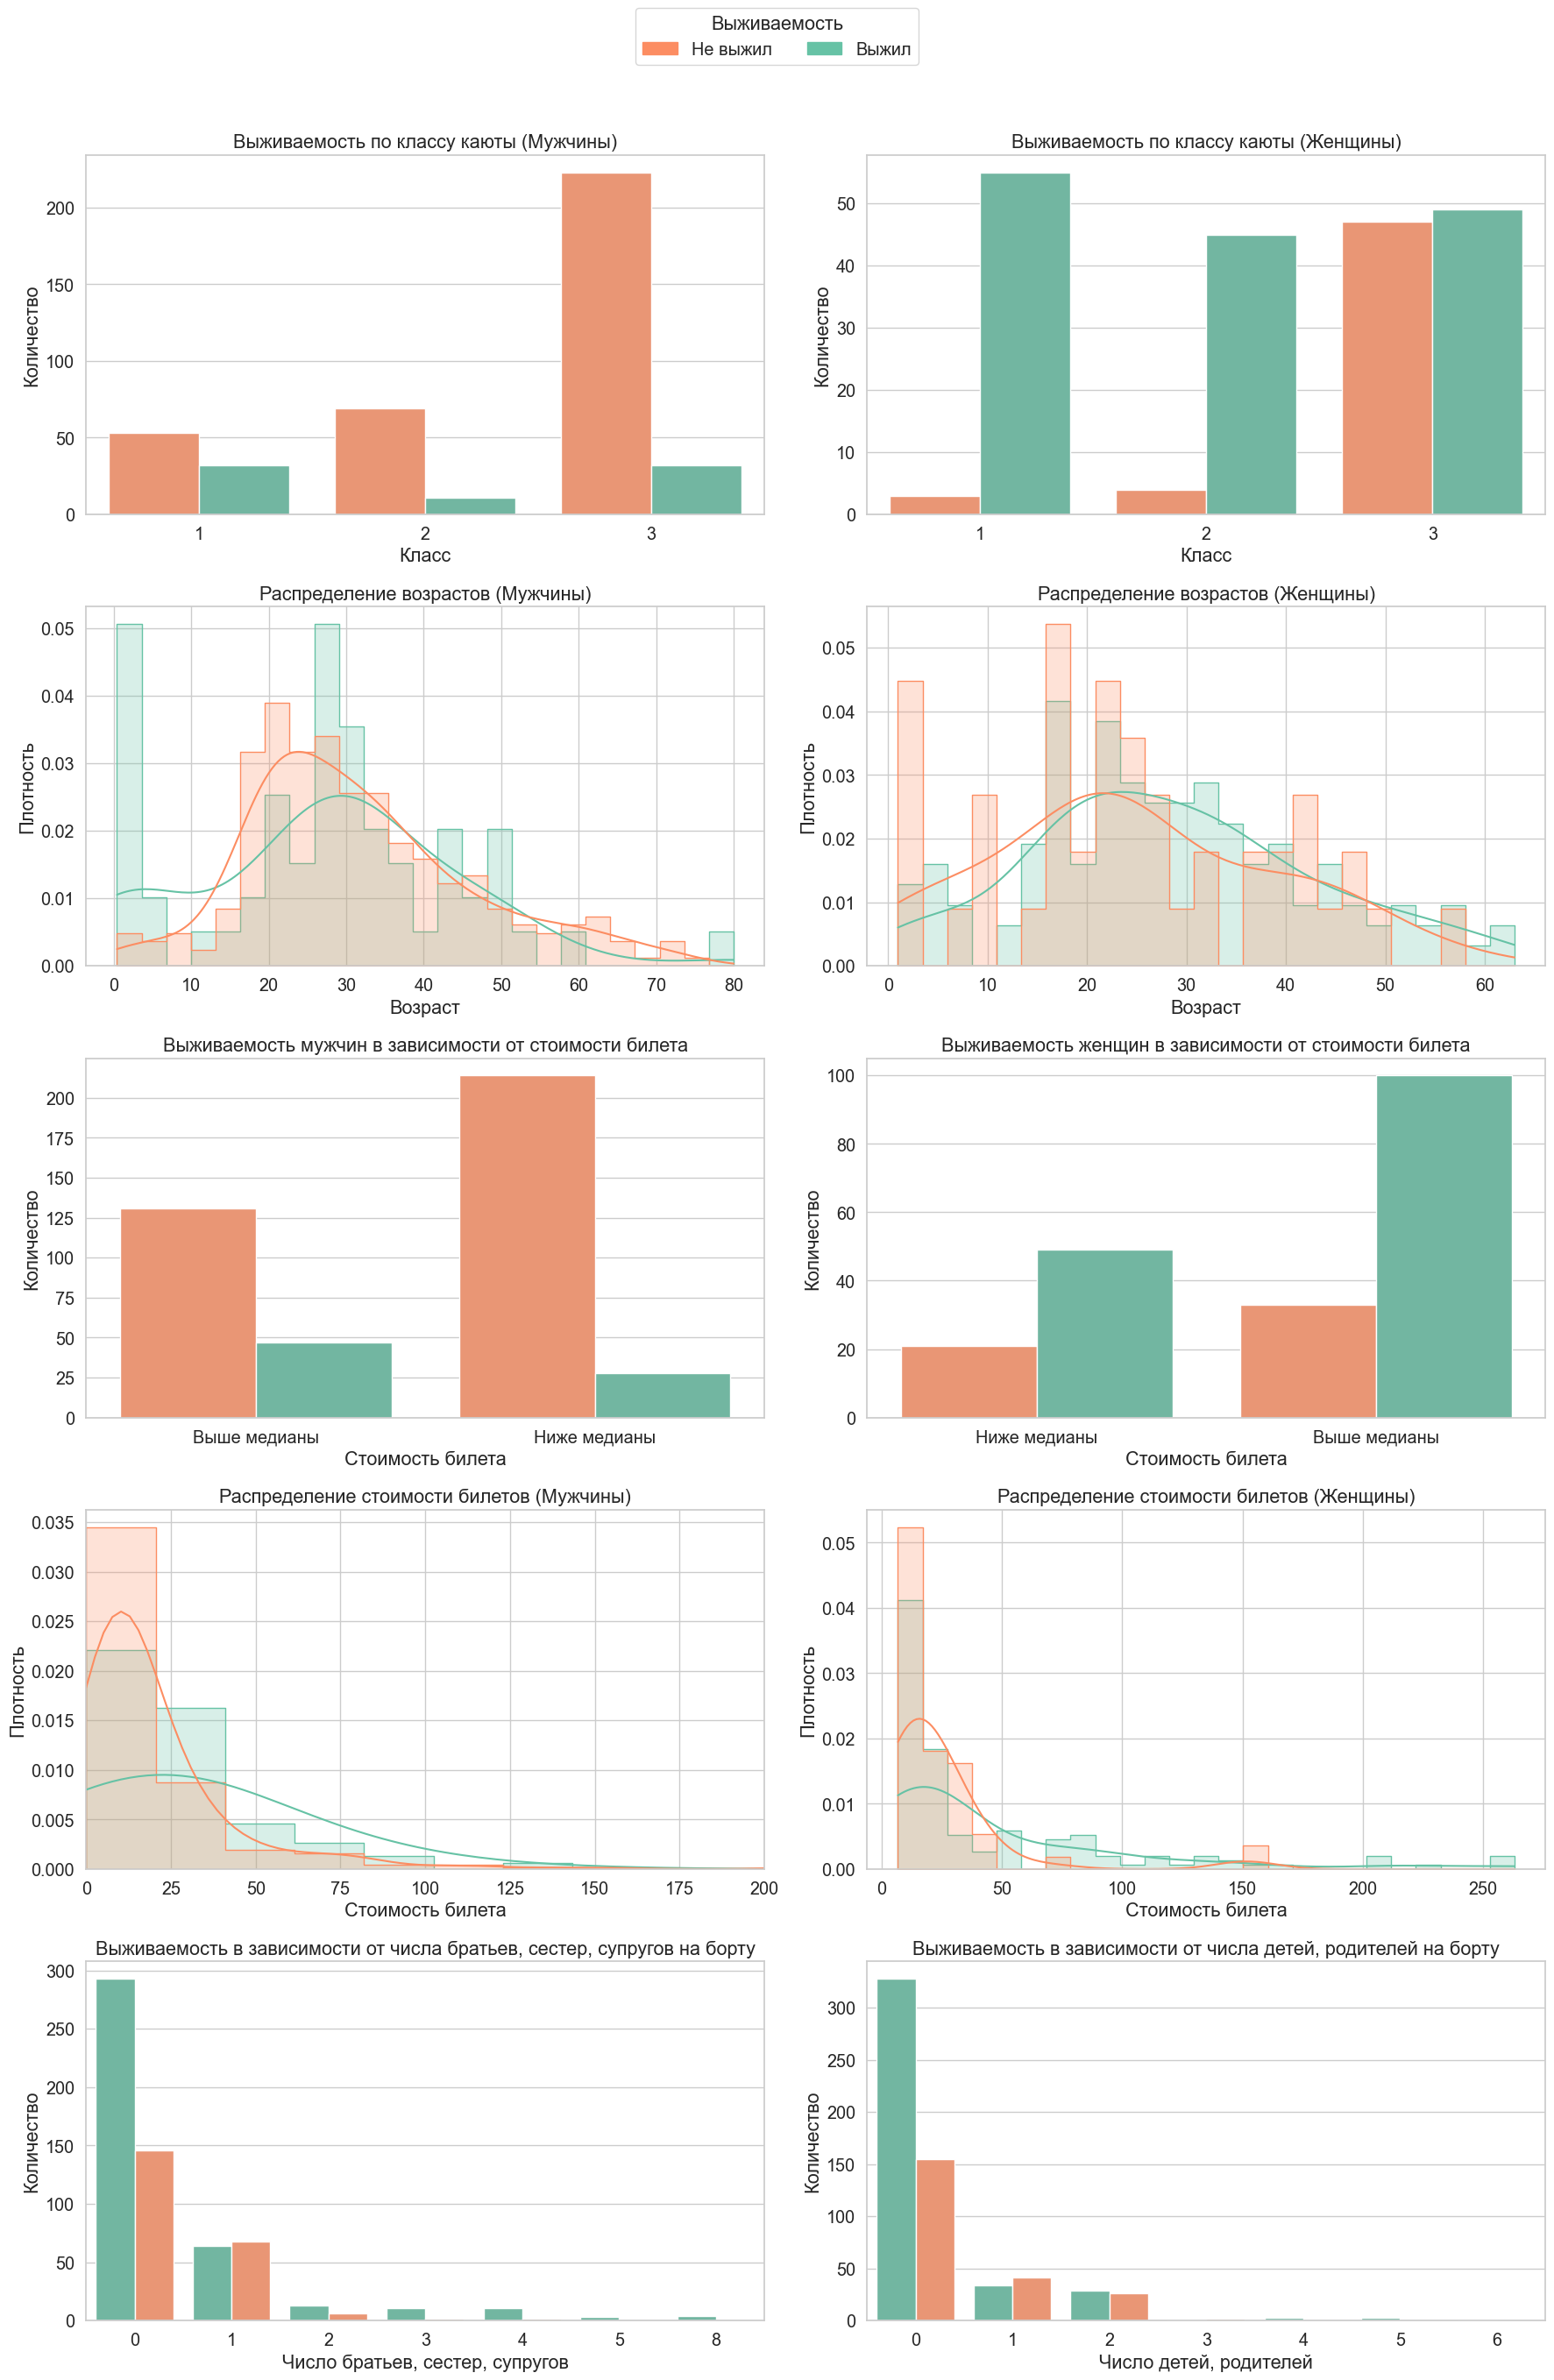

In [37]:
plt.figure(figsize=(18, 26))
palette_colors = sns.color_palette("Set2")

plt.subplot(5, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=male_passengers, palette={0: palette_colors[1], 1: palette_colors[0]})
plt.title('Выживаемость по классу каюты (Мужчины)')
plt.ylabel('Количество')
plt.xlabel('Класс')
plt.legend().remove()

plt.subplot(5, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=female_passengers, palette={0: palette_colors[1], 1: palette_colors[0]})
plt.title('Выживаемость по классу каюты (Женщины)')
plt.ylabel('Количество')
plt.xlabel('Класс')
plt.legend().remove()

plt.subplot(5, 2, 3)
sns.histplot(data=male_passengers, x='Age', hue='Survived', kde=True, element='step', stat='density',palette={0: palette_colors[1], 1: palette_colors[0]}, bins=25, common_norm=False)
plt.title('Распределение возрастов (Мужчины)')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend().remove()

plt.subplot(5, 2, 4)
sns.histplot(data=female_passengers, x='Age', hue='Survived', kde=True, element='step', stat='density',palette={0: palette_colors[1], 1: palette_colors[0]}, bins=25, common_norm=False)
plt.title('Распределение возрастов (Женщины)')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend().remove()

plt.subplot(5, 2, 5)
sns.countplot(x='TicketsCost', hue='Survived', data=male_passengers_copy, palette={0: palette_colors[1], 1: palette_colors[0]})
plt.title('Выживаемость мужчин в зависимости от стоимости билета')
plt.ylabel('Количество')
plt.xlabel('Стоимость билета')
plt.legend(title='Выживаемость', labels=['Не выжил', 'Выжил'])
plt.legend().remove()

plt.subplot(5, 2, 6)
sns.countplot(x='TicketsCost', hue='Survived', data=female_passengers_copy, palette={0: palette_colors[1], 1: palette_colors[0]})
plt.title('Выживаемость женщин в зависимости от стоимости билета')
plt.ylabel('Количество')
plt.xlabel('Стоимость билета')
plt.legend(title='Выживаемость', labels=['Не выжил', 'Выжил'])
plt.legend().remove()

plt.subplot(5, 2, 7)
sns.histplot(data=male_passengers, x='Fare', hue='Survived', kde=True, element='step', stat='density',palette={0: palette_colors[1], 1: palette_colors[0]}, bins=25, common_norm=False)
plt.title('Распределение стоимости билетов (Мужчины)')
plt.xlabel('Стоимость билета')
plt.ylabel('Плотность')
plt.xlim(0, 200)
plt.legend().remove()

plt.subplot(5, 2, 8)
sns.histplot(data=female_passengers, x='Fare', hue='Survived', kde=True, element='step', stat='density',palette={0: palette_colors[1], 1: palette_colors[0]},bins=25, common_norm=False)
plt.title('Распределение стоимости билетов (Женщины)')
plt.xlabel('Стоимость билета')
plt.ylabel('Плотность')
plt.legend().remove()

plt.subplot(5, 2, 9)
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.title('Выживаемость в зависимости от числа братьев, сестер, супругов на борту')
plt.xlabel('Число братьев, сестер, супругов')
plt.ylabel('Количество')
plt.legend().remove()

plt.subplot(5, 2, 10)
sns.countplot(x='Parch', hue='Survived', data=train_df)
plt.title('Выживаемость в зависимости от числа детей, родителей на борту')
plt.xlabel('Число детей, родителей')
plt.ylabel('Количество')
plt.legend().remove()

legend_labels = ['Не выжил', 'Выжил'] 
legend_colors = [plt.Rectangle((0,0),1,1, color=color) for color in [palette_colors[1], palette_colors[0]]]

plt.figlegend(legend_colors, legend_labels, loc='upper center', ncol=2, title='Выживаемость', bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()  
plt.show()

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [9]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    distances = np.sqrt(((B[:, np.newaxis, :] - A[np.newaxis, :, :]) ** 2).sum(axis=2))
    nearest_indices = np.argsort(distances, axis=1)[:, :k]
    return nearest_indices

def knn(features, train_features, train_target, k=1):
    features_np = features.to_numpy()
    train_features_np = train_features.to_numpy()
    train_target_np = train_target.to_numpy()

    nearest_indices = find_nearest_points(train_features_np, features_np, k)
    nearest_labels = train_target_np[nearest_indices]
    predicted = [np.argmax(np.bincount(labels)) for labels in nearest_labels]

    return pd.Series(predicted, index=features.index)

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

In [10]:
train_features_filtered = train_features[['Age', 'Fare']].dropna(subset=['Age', 'Fare'], how='any')
test_features_filtered = test_features[['Age', 'Fare']].dropna(subset=['Age', 'Fare'], how='any')
train_features_filtered = (train_features_filtered - train_features_filtered.mean()) / train_features_filtered.std()
test_features_filtered = (test_features_filtered - test_features_filtered.mean()) / test_features_filtered.std()
train_target_filtered = train_target[train_features_filtered.index]
test_features_filtered.head(10)

,Age,Fare
0,-1.005513,0.028578
1,-0.061875,-0.514746
2,-2.112472,-0.351711
3,-0.787750,-0.226215
4,-0.061875,-0.226215
5,0.881762,3.525166
6,-1.005513,-0.514746
7,-0.715163,-0.562680
8,0.736587,2.146495
12,0.010712,-0.563224


#### Метрика
Евклидова метрика расстояния
#### 1.Обработка пропущенных значений
Признаки Age и Fare могут содержать пропущенные значения, их лучше удалить
#### 2.Масштабирование признаков
Поскольку метод KNN чувствителен к масштабу признаков, важно масштабировать Age и Fare, чтобы они вносили равный вклад в расчет расстояния. Это можно сделать с помощью стандартизации (вычитание среднего значения признака и деление на стандартное отклонение)

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [11]:
predict1 = knn(test_features_filtered, train_features_filtered, train_target_filtered, 1)
predict2 = knn(test_features_filtered, train_features_filtered, train_target_filtered, 3)
predict3 = knn(test_features_filtered, train_features_filtered, train_target_filtered, 5)
d = {'k = 1': predict1, 'k = 3': predict2, 'k = 5': predict3}
predicts = pd.DataFrame(d)
predicts.head(15)

,k = 1,k = 3,k = 5
0,1,1,0
1,0,0,0
2,1,1,1
3,0,0,0
4,0,0,0
5,1,1,1
6,1,1,1
7,0,0,0
8,1,1,1
12,0,0,0


Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

Чтобы учесть другие признаки, такие как пол (Sex), класс билета (Pclass) и т.д., важно выполнить соответствующую предобработку:

1)Категориальные признаки следует преобразовать в числовой формат с помощью one-hot encoding или других методов кодирования.
2)Все признаки следует привести к единому масштабу.

Возможные проблемы:

1)Проклятие размерности. С увеличением количества признаков эффективность KNN может снижаться из-за разреженности данных в многомерном пространстве
2)Некоторые признаки могут оказывать большее влияние на предсказания, чем другие, что может потребовать введения весов для различных признаков или выбора более релевантных признаков для модели.

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Уровень 0 (корень): Пол (Sex)

Если Sex == 'male', переходим к Уровню 1, Узел A.

Если Sex == 'female', предсказываем "Выжил".

Уровень 1, Узел A (для мужчин): Класс билета (Pclass)

Если Pclass == 1, предсказываем "Выжил".

Если Pclass == 2 или 3, переходим к Уровню 2.

Уровень 2 (для мужчин с Pclass 2 или 3): Возраст (Age)

Если Age <= 12, предсказываем "Выжил".

Если Age > 12, предсказываем "Не выжил".

**Дерево 2:**

Уровень 0 (корень): Стоимость билета (Fare)

Если Fare > 50, предсказываем "Выжил".

Если Fare <= 50, предсказываем "Не выжил".

Реализуйте полученные деревья по шаблону

In [16]:
import pandas as pd

def tree1(features):
    predicted = []
    for index, row in features.iterrows():
        if row['Sex'] == 'female':
            predicted.append(1)  
        else:
            if row['Pclass'] == 1:
                predicted.append(1)  
            else:
                if row['Age'] <= 10:
                    predicted.append(1)  
                else:
                    predicted.append(0)  
    return pd.Series(predicted, index=features.index)

def tree2(features):
    predicted = []
    for index, row in features.iterrows():
        if row['Fare'] > 50 :
            predicted.append(1)
        else:
            predicted.append(0)
    return pd.Series(predicted, index=features.index)


#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Качество = (Кол-во верно предсказанных) / (Общее количество)

Реализуйте данный критерий по шаблону

In [17]:
def criteria(target, predicted):
    correct_predict = (target == predicted).sum()
    return correct_predict / target.shape[0]

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [27]:
test_target_filtered = test_target[predicts.index]
quality_knn = criteria(test_target_filtered, predict2)
quality_tree1 = criteria(test_target, tree1(test_features))
quality_tree2 = criteria(test_target, tree2(test_features))
print(f"качество knn - {quality_knn}, качество tree1 - {quality_tree1}, качество tree2 - {quality_tree2}")

качество knn - 0.6591928251121076, качество tree1 - 0.746268656716418, качество tree2 - 0.6828358208955224


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

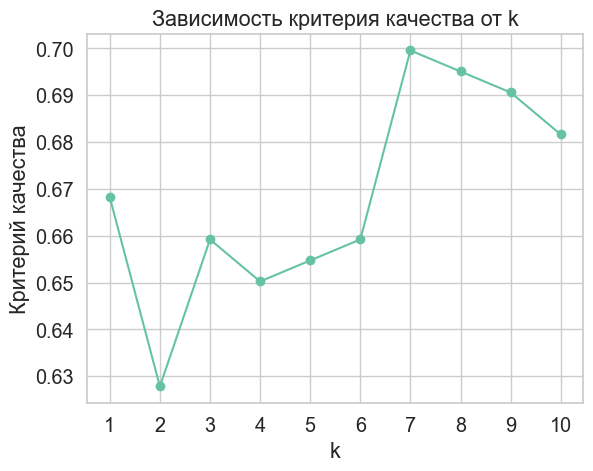

In [15]:
qualities = []
for k in range (1, 11):
    predict_k = knn(test_features_filtered, train_features_filtered, train_target_filtered, k)
    quality_k = criteria(test_target_filtered, predict_k)
    qualities.append(quality_k)
plt.plot(range(1, 11), qualities, marker='o')
plt.xlabel('k')
plt.ylabel('Критерий качества')
plt.title('Зависимость критерия качества от k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

##### При малых значениях k 
Модель может быть чрезмерно чувствительной к шуму обучающих данных (переобучение), что приводит к более низкому качеству на тестовой выборке.
##### С увеличением k
Модель становится более устойчивой к шуму, и качество предсказаний может улучшаться до определенного момента.
##### При слишком больших значениях k 
Модель может стать слишком обобщенной (недообучение), упуская важные особенности данных, что также приведет к снижению качества.

#### 6. Выводы

Эксперимент показал, что данные о пассажирах Титаника демонстрируют значимое влияние определенных признаков на шансы выживания во время катастрофы. В частности, метод ближайших соседей (KNN) и анализ с помощью двух различных решающих деревьев выявили ключевую роль таких факторов, как пол, возраст и класс билета. При этом женщины и дети, а также пассажиры первого класса имели значительно больше шансов на спасение по сравнению с мужчинами, взрослыми и пассажирами более низких классов.

Модель KNN, адаптированная к анализу данных Титаника, подтвердила важность комплексного учета различных признаков для оценки выживаемости. Это подчеркивает, что методы анализа данных могут эффективно обрабатывать и интерпретировать сложные взаимосвязи между разными характеристиками.

Первое решающее дерево, сосредоточенное на поле, классе билета и возрасте, иллюстрировало, как простая иерархическая структура может выявить важные паттерны в данных, при этом явно выделяя группы с высокими шансами на выживание. Второе дерево, с меньшей глубиной, акцентировало внимание на экономическом статусе, представленном через стоимость билета, как на единственном, но значимом факторе.

Оба подхода к построению решающих деревьев, несмотря на их простоту, позволили выявить ключевые факторы выживаемости и подтвердили выводы, сделанные на основе более сложного метода KNN. Это демонстрирует, что даже простые модели могут быть мощным инструментом для понимания данных и принятия обоснованных решений в условиях неопределенности.